The aim of this notebook is to predict the method the customer will be use to pay for the order. From the dataset, the dependent variable is payment_type. The choices of payment are credit card, debit card, voucher, and boleto.
Therefore, this notebook will explore multi label logistic regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payment = pd.read_csv('olist_order_payments_dataset.csv')
order_review = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')

In [71]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [72]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [73]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [74]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [75]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [76]:
products=pd.merge(products,order_items[['order_id','product_id']],on = 'product_id')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb


In [77]:
# Merge order_id and customer_id
order_payment = pd.merge(order_payment, orders, on='order_id')
order_payment = pd.merge(order_payment, customers, on='customer_id')
order_payment = pd.merge(order_payment,products, on ='order_id')

In [78]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,customer_state,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,...,MG,af74cc53dcffc8384b29e7abfa41902b,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,...,SP,a630cc320a8c872f9de830cf121661a3,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,...,SP,2028bf1b01cafb2d2b1901fca4083222,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,MG,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,...,SP,386486367c1f9d4f587a8864ccb6902b,cama_mesa_banho,54.0,120.0,1.0,835.0,40.0,9.0,33.0


In [79]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 25 columns):
order_id                         117601 non-null object
payment_sequential               117601 non-null int64
payment_type                     117601 non-null object
payment_installments             117601 non-null int64
payment_value                    117601 non-null float64
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null object
order_delivered_customer_date    115034 non-null object
order_estimated_delivery_date    117601 non-null object
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
customer_city                    117601 non-null object
customer_state                   117601 non-null ob

There are missing values present in the dataframe

##### Missing value imputation

In [80]:
order_payment['product_length_cm'] = order_payment['product_length_cm'].fillna(order_payment.product_length_cm.mean())
order_payment['product_height_cm'] = order_payment['product_height_cm'].fillna(order_payment.product_height_cm.mean())
order_payment['product_width_cm'] = order_payment['product_width_cm'].fillna(order_payment.product_width_cm.mean())
order_payment['product_name_lenght'] = order_payment['product_name_lenght'].fillna(order_payment.product_name_lenght.mean())
order_payment['product_description_lenght'] = order_payment['product_description_lenght'].fillna(order_payment.product_description_lenght.mean())
order_payment['product_photos_qty'] = order_payment['product_photos_qty'].fillna(order_payment.product_photos_qty.mean())
order_payment['product_weight_g'] = order_payment['product_weight_g'].fillna(order_payment.product_weight_g.mean())

In [81]:
order_payment['product_category_name'] = order_payment['product_category_name'].fillna(order_payment.product_category_name.mode()[0])

In [82]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 25 columns):
order_id                         117601 non-null object
payment_sequential               117601 non-null int64
payment_type                     117601 non-null object
payment_installments             117601 non-null int64
payment_value                    117601 non-null float64
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null object
order_delivered_customer_date    115034 non-null object
order_estimated_delivery_date    117601 non-null object
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
customer_city                    117601 non-null object
customer_state                   117601 non-null ob

###### Feature Engineering

In [83]:
order_payment['volume']=order_payment.product_length_cm * order_payment.product_height_cm * order_payment.product_width_cm

In [84]:
# order_payment.order_delivered_customer_date = pd.to_datetime(order_payment.order_delivered_customer_date).dt.date
# order_payment.order_estimated_delivery_date = pd.to_datetime(order_payment.order_estimated_delivery_date).dt.date
# order_payment['delay_delivery']=(order_payment.order_delivered_customer_date-order_payment.order_estimated_delivery_date)

### Convert Categorical Variables to Numerical Variables

The number of columns will drastically increase after converting categorical variables to numerical variables using One Hot Encoding method. Therefore using another method, which is Label Encoding method

In [85]:
cat_var=['order_status','customer_state','customer_city','product_category_name','payment_type']

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
order_payment[cat_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 5 columns):
order_status             117601 non-null object
customer_state           117601 non-null object
customer_city            117601 non-null object
product_category_name    117601 non-null object
payment_type             117601 non-null object
dtypes: object(5)
memory usage: 5.4+ MB


In [88]:
le = LabelEncoder()
for col in cat_var:
    order_payment[col]=le.fit_transform(order_payment[col])
    keys=le.classes_
    values=le.transform(le.classes_)
    param = dict(zip(keys,values))
    if col == 'order_status':
        params_order_status = pd.DataFrame(param.keys(),param.values())
    elif col == 'customer_state':
        params_customer_state = pd.DataFrame(param.keys(),param.values())
    elif col == 'customer_city':
        params_customer_city = pd.DataFrame(param.keys(),param.values())
    elif col == 'payment_type':
        params_y = pd.DataFrame(param.keys(),param.values())
    else:
        params_product_category_name = pd.DataFrame(param.keys(),param.values())

In [89]:
order_payment[cat_var].head()

,order_status,customer_state,customer_city,product_category_name,payment_type
0,2,10,3830,16,1
1,2,25,3588,8,1
2,2,25,3588,62,1
3,2,10,2001,13,1
4,2,25,1019,13,1


In [90]:
params_order_status.head()

,0
0,approved
1,canceled
2,delivered
3,invoiced
4,processing


In [91]:
params_customer_state.head()

,0
0,AC
1,AL
2,AM
3,AP
4,BA


In [92]:
params_customer_city.head()

,0
0,abadia dos dourados
1,abadiania
2,abaete
3,abaetetuba
4,abaiara


In [93]:
params_product_category_name.head()

,0
0,agro_industria_e_comercio
1,alimentos
2,alimentos_bebidas
3,artes
4,artes_e_artesanato


In [94]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume
0,b81ef226f3fe1789b1e8b2acac839d17,1,1,8,99.33,0a8556ac6be836b46b3e89920d59291c,2,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,...,af74cc53dcffc8384b29e7abfa41902b,16,57.0,921.0,8.0,800.0,17.0,27.0,17.0,7803.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,1,24.39,f2c7fc58a9de810828715166c672f10a,2,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,...,a630cc320a8c872f9de830cf121661a3,8,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,1056.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,...,2028bf1b01cafb2d2b1901fca4083222,62,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,3360.0
3,ba78997921bbcdc1373bb41e913ab953,1,1,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,548e5bfe28edceab6b51fa707cc9556f,13,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,3080.0
4,42fdf880ba16b47b59251dd489d4441a,1,1,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,...,386486367c1f9d4f587a8864ccb6902b,13,54.0,120.0,1.0,835.0,40.0,9.0,33.0,11880.0


In [95]:
params_y

,0
0,boleto
1,credit_card
2,debit_card
3,voucher


### Heatmap to analyze if any features are redundant

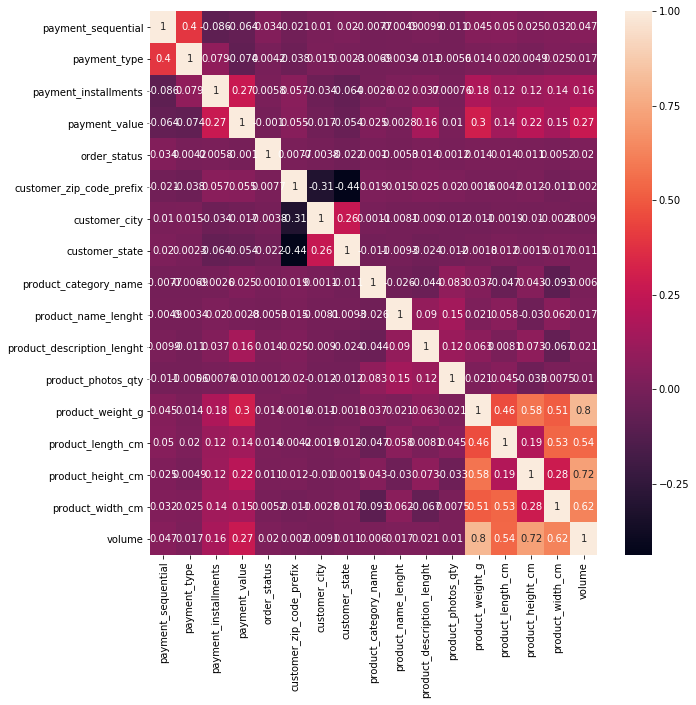

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(order_payment.corr(),annot=True)
plt.show()

##### Dropping redundant variables

In [97]:
order_payment.drop(columns=['order_purchase_timestamp','customer_id','order_approved_at','order_delivered_carrier_date',
                           'order_delivered_customer_date','order_estimated_delivery_date','customer_unique_id',
                           'product_length_cm','product_height_cm','product_width_cm','order_id','product_id'], inplace=True)

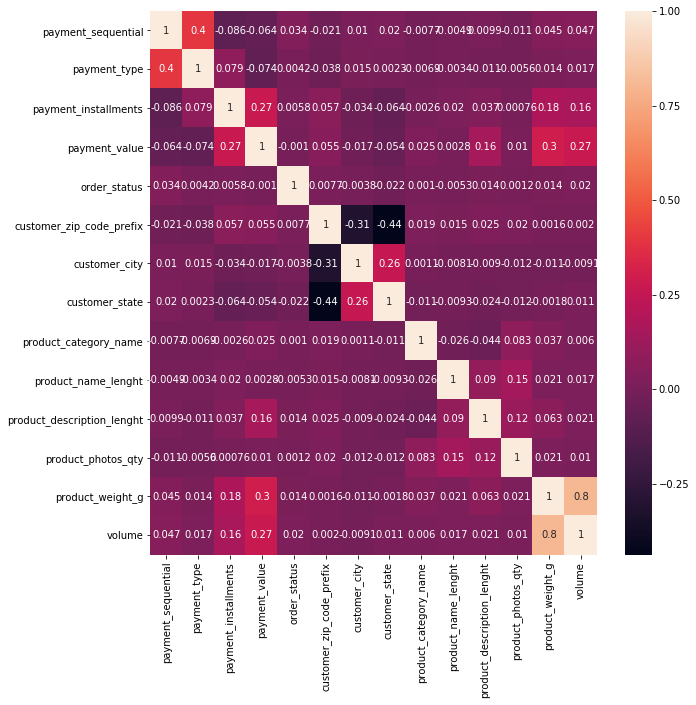

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(order_payment.corr(),annot=True)
plt.show()

In [99]:
order_payment.drop(columns=['product_weight_g'], inplace=True)

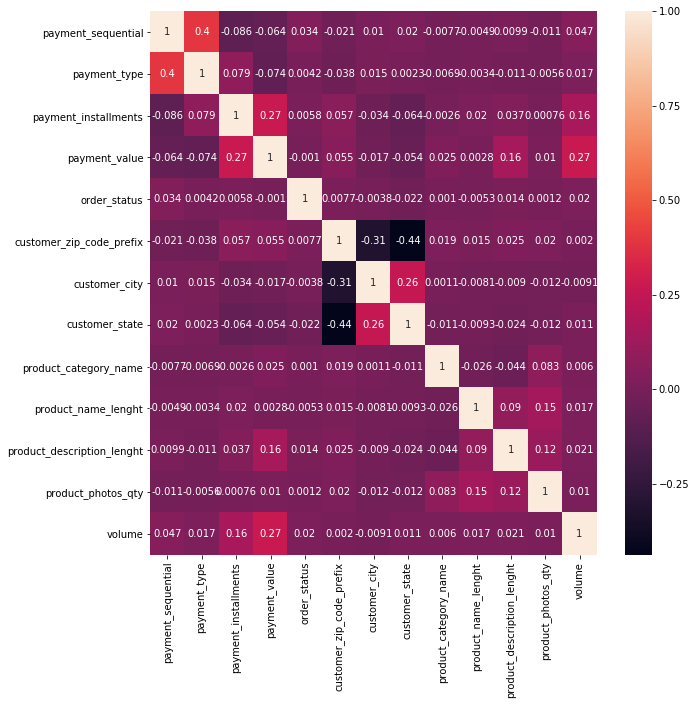

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(order_payment.corr(),annot=True)
plt.show()

Dependent variable = payment_type


#### Check for a relationship between independent variables and dependent variable

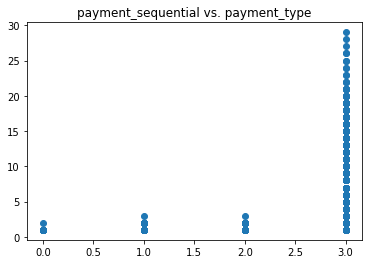

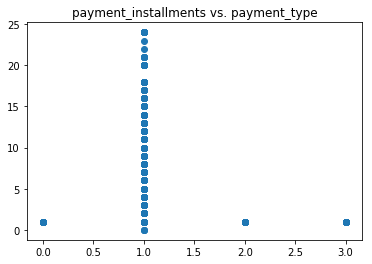

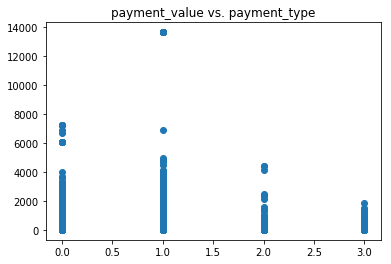

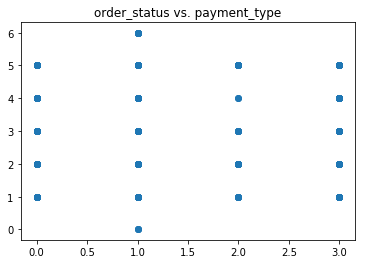

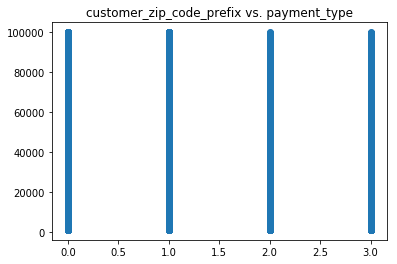

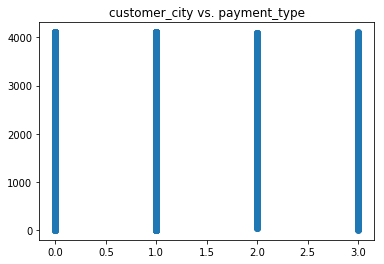

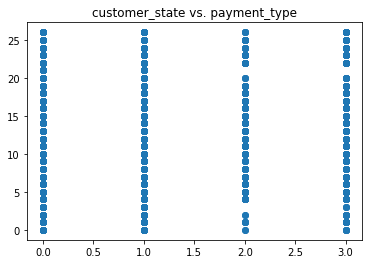

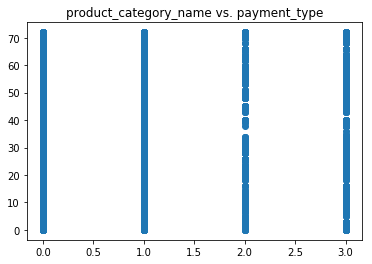

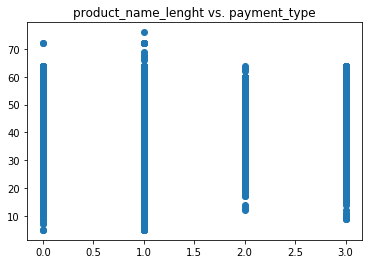

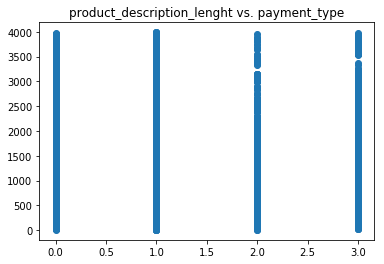

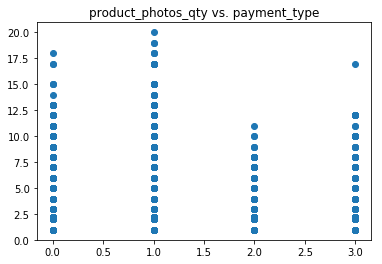

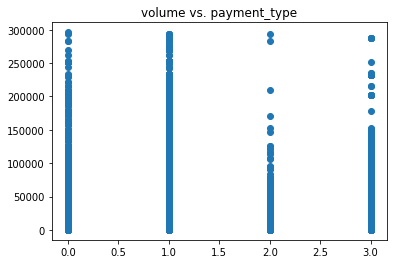

In [101]:
for col in order_payment:
    if col not in ['payment_type','order_id','product_id']:
        plt.scatter(order_payment.payment_type,order_payment[col])
        plt.title(col+' vs. payment_type')
        plt.show()

In [102]:
order_payment.columns

Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_status', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'volume'],
      dtype='object')

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [104]:
# Standardize the numerical variables
scaler = StandardScaler()
order_payment[['payment_value','product_name_lenght','product_description_lenght',
              'product_photos_qty','volume']]=scaler.fit_transform(order_payment[['payment_value','product_name_lenght','product_description_lenght',
                                                                                  'product_photos_qty','volume']])

In [105]:
# Split the dataset into train and test sets
x = order_payment.drop(columns='payment_type')
y = order_payment.payment_type
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.7,random_state=40)

In [106]:
# Building the model with default parameters
logreg = LogisticRegression(multi_class='multinomial')

In [107]:
logreg.fit(xtrain,ytrain)
ytrain_pred = logreg.predict(xtrain)

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [108]:
from sklearn import metrics

In [109]:
cm = metrics.confusion_matrix(ytrain,ytrain_pred)
print(cm)

[[    0 16089     0     0]
 [    0 60654     0     0]
 [    0  1204     0     0]
 [    0  4373     0     0]]


In [110]:
ytrain_pred

array([1, 1, 1, ..., 1, 1, 1])

From this confusion matrix and from studying ytrain_pred, it can be seen that the model was only predicting one value 'credit_card'

In [111]:
# Building the model with different parameters
logreg2 = LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [112]:
logreg2.fit(xtrain,ytrain)
ytrain_pred2 = logreg2.predict(xtrain)

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [113]:
cm2 = metrics.confusion_matrix(ytrain,ytrain_pred2)
print(cm2)

[[ 3800 12289     0     0]
 [ 2413 58170     0    71]
 [  193   984     0    27]
 [  426  1024     0  2923]]


After changing the solver, the model was able to predict far more accurately than when solver = default. However, after analyzing the confusion matrix, it can be seen that the model is still not able to identify payment_type = 'voucher'

In [114]:
# Building the model with different parameters
logreg3 = LogisticRegression(multi_class='multinomial',solver='sag')

In [115]:
logreg3.fit(xtrain,ytrain)
ytrain_pred3 = logreg3.predict(xtrain)

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [116]:
cm3 = metrics.confusion_matrix(ytrain,ytrain_pred3)
print(cm3)

[[    0 16089     0     0]
 [    0 60654     0     0]
 [    0  1204     0     0]
 [    0  4373     0     0]]


Solver = 'sag' performed worse than newton-cg solver. For all predictions, the same value is outputted; credit_card.

In [117]:
# Building the model with different parameters
logreg4 = LogisticRegression(multi_class='multinomial',solver='saga')

In [118]:
logreg4.fit(xtrain,ytrain)
ytrain_pred4 = logreg4.predict(xtrain)

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [119]:
cm4 = metrics.confusion_matrix(ytrain,ytrain_pred4)
print(cm4)

[[    0 16089     0     0]
 [    0 60654     0     0]
 [    0  1204     0     0]
 [    0  4373     0     0]]


Solver = 'saga' has the same predictive capabilities as 'sag' for this particular dataset.

After using the four different solvers, it can be concluded that newton-cg is the best performing model out of these four models.

In [122]:
# Printing the accuracy score for each of the predictions
print('Model 1 =',metrics.accuracy_score(ytrain,ytrain_pred))
print('Model 2 =',metrics.accuracy_score(ytrain,ytrain_pred2))
print('Model 3 =',metrics.accuracy_score(ytrain,ytrain_pred3))
print('Model 4 =',metrics.accuracy_score(ytrain,ytrain_pred4))

Model 1 = 0.7368075801749271
Model 2 = 0.788301749271137
Model 3 = 0.7368075801749271
Model 4 = 0.7368075801749271


From these values, it can be concluded that Model 2, which used newton-cg solver is the best performing model.
However, accuracy is not the best indicator of performance. Therefore deriving precision and AUC scores are necessary

In [124]:
# To measure auc, probabilities are required therefore saving the predict probabilities for each model
ytrain_pred_classes = logreg.predict_proba(xtrain)
ytrain_pred_classes2 = logreg2.predict_proba(xtrain)
ytrain_pred_classes3 = logreg3.predict_proba(xtrain)
ytrain_pred_classes4 = logreg4.predict_proba(xtrain)

In [125]:
auc1 = metrics.roc_auc_score(ytrain, ytrain_pred_classes,multi_class='ovr')
auc2 = metrics.roc_auc_score(ytrain, ytrain_pred_classes2,multi_class='ovr')
auc3 = metrics.roc_auc_score(ytrain, ytrain_pred_classes3,multi_class='ovr')
auc4 = metrics.roc_auc_score(ytrain, ytrain_pred_classes4,multi_class='ovr')

In [126]:
print('AUC for model 1 =',auc1)
print('AUC for model 2 =',auc2)
print('AUC for model 3 =',auc3)
print('AUC for model 4 =',auc4)

AUC for model 1 = 0.5074590706424383
AUC for model 2 = 0.8664828564999987
AUC for model 3 = 0.5059402511660305
AUC for model 4 = 0.5047268330716111


Based on the AUC scores for each of the models, it can be seen that model 2 performed the best, as it has the highest AUC score. 

In [127]:
precision1 = metrics.precision_score(ytrain, ytrain_pred, average = None)
precision2 = metrics.precision_score(ytrain, ytrain_pred2,average = None)
precision3 = metrics.precision_score(ytrain, ytrain_pred3,average = None)
precision4 = metrics.precision_score(ytrain, ytrain_pred4,average = None)

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anupama\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anupama\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anupama\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: Undefi

In [128]:
print('Precision of model 1 =',precision1)
print('Precision of model 2 =',precision2)
print('Precision of model 3 =',precision3)
print('Precision of model 4 =',precision4)

Precision of model 1 = [0.         0.73680758 0.         0.        ]
Precision of model 2 = [0.55620609 0.8027102  0.         0.96756041]
Precision of model 3 = [0.         0.73680758 0.         0.        ]
Precision of model 4 = [0.         0.73680758 0.         0.        ]


In [129]:
sum(precision2)/3

0.7754922328594018

Since Model 2 had the highest AUC, using model 2 to predict on the test set

In [135]:
ytest_pred = logreg2.predict(xtest)

In [136]:
# Finding the accuracy of the prediction
print(metrics.accuracy_score(ytest,ytest_pred))

0.7915308523001049


In [138]:
# Finding the AUC score
ytest_pred_prob=logreg2.predict_proba(xtest)
print('AUC score =',metrics.roc_auc_score(ytest,ytest_pred_prob,multi_class='ovr'))

AUC score = 0.8725279132670092
